In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)

In [57]:
# Step 2: Load the Dataset
file_path = "C:\\Users\\shrey\\Downloads\\archive (1)\\Churn_Modelling.csv"
data = pd.read_csv(file_path)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [58]:
# Step 3: Explore the Data
print("Dataset head:\n", data.head())
print("Dataset info:\n", data.info())
print("Dataset description:\n", data.describe())

Dataset head:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0 

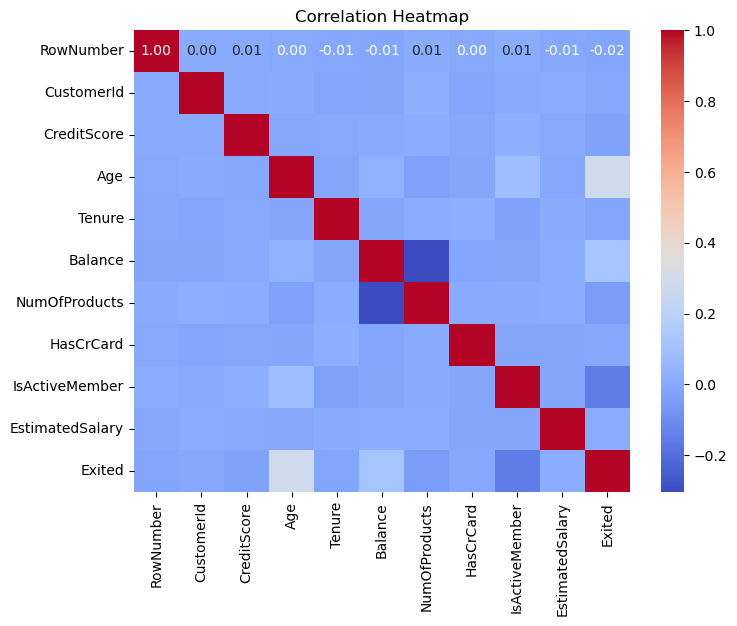

In [59]:
# Step 4: Data Visualization - Correlation Heatmap
# Drop non-numeric columns before computing the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [60]:
# Step 5: Preprocess the Data
# Check available columns
print("Columns in the dataset:", data.columns)

# Drop unnecessary columns if they exist
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
if 'Geography' in data.columns:
    data['Geography'] = label_encoder.fit_transform(data['Geography'])
if 'Gender' in data.columns:
    data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Display the first few rows after preprocessing
print(data.head())


Columns in the dataset: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1  

In [61]:
# Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [62]:
# Step 6: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Step 7: Train Models
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [36]:
# Step 8: Evaluate Models
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Logistic Regression Evaluation:
Accuracy: 0.815
Confusion Matrix:
 [[1559   48]
 [ 322   71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

ROC-AUC Score: 0.7635567040508209

Random Forest Evaluation:
Accuracy: 0.864
Confusion Matrix:
 [[1545   62]
 [ 210  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

ROC-AUC Score: 0.8566917002744039

Gradient Boosting Evaluation:
Accuracy: 0.865

In [65]:
# Step 8: Hyperparameter Tuning for Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
rf_model = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


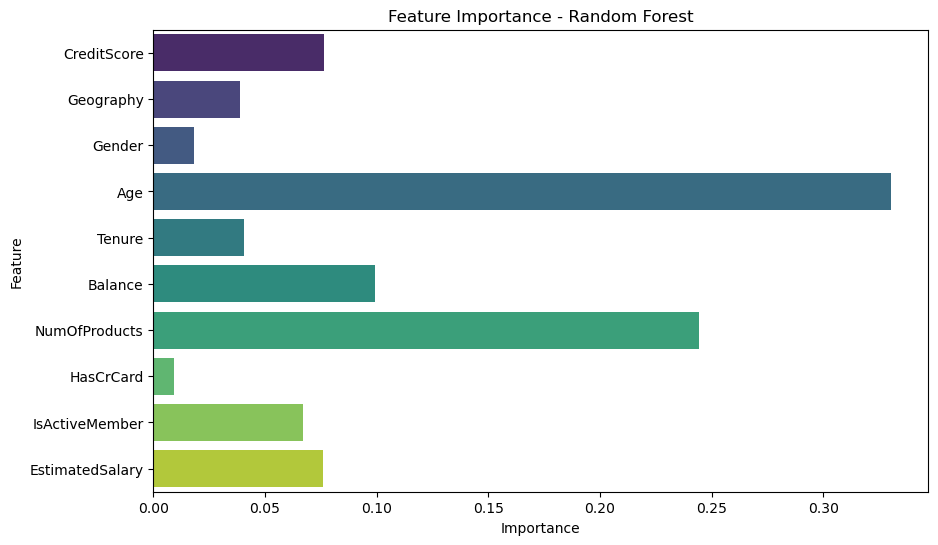

In [66]:
# Step 9: Visualize Model Results
# Feature Importance for Random Forest
feature_names = data.drop('Exited', axis=1).columns
rf_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=feature_names, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


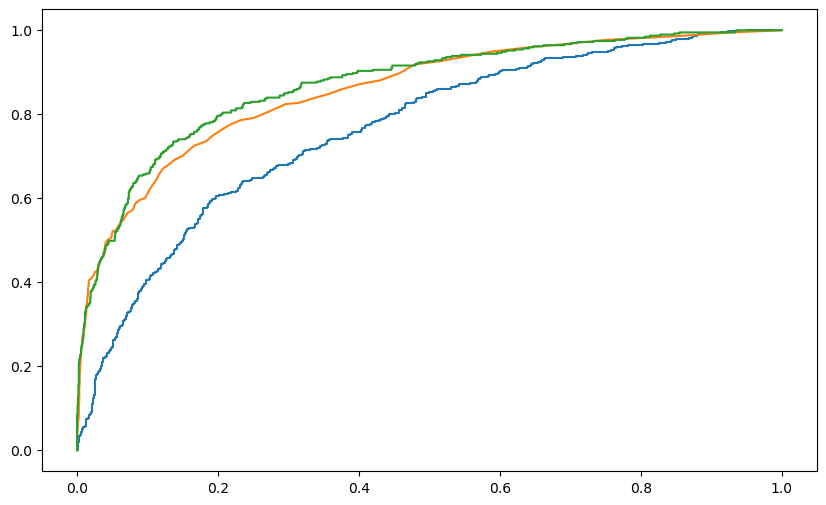

In [38]:
# ROC Curve for All Models
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC: {roc_auc_score(y_test, y_proba):.2f})')


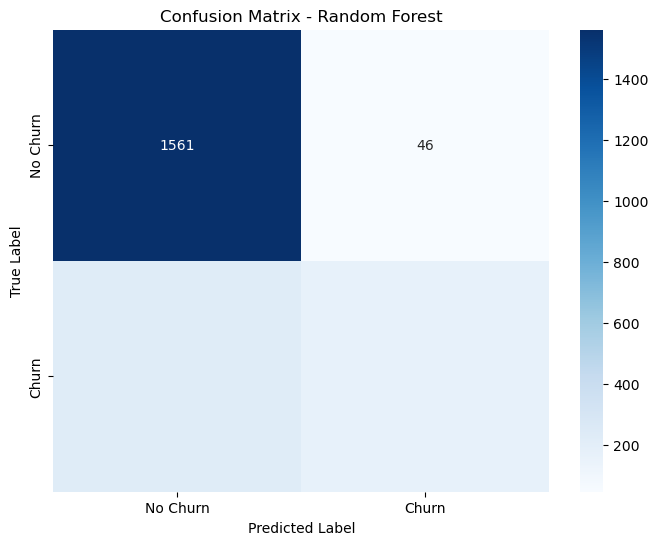

In [68]:

# Confusion Matrix Heatmap for Random Forest
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [69]:
# Step 10: Make Predictions
sample_data = X_test[:5]  # Example samples
sample_predictions = rf_model.predict(sample_data)
print("\nSample Predictions (Random Forest):", sample_predictions)


Sample Predictions (Random Forest): [0 0 0 0 0]
